In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:25]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe']

In [3]:
len(words)

32033

In [4]:
print('Minimum word length: ' + str(min(len(w) for w in words)))
print('Maximum word length: ' + str(max(len(ww) for ww in words)))

Minimum word length: 2
Maximum word length: 15


In [5]:
# Bigram - weak language model / predict next char based on previous char

# -----Small example-----
# for w in words[3:6:2]:                            # [3:6:2] shows 4th and 6th word | [1:2] shows 2nd word
#     chs = ['<Start>'] + list(w) + ['<End>']
#     for ch1, ch2 in zip(chs, chs[1:]):
#         print(ch1, ch2)

# --------Output of Small example--------
# <Start> i
# i s
# s a
# a b
# b e
# e l
# l l
# l a
# a <End>
# <Start> c
# c h
# h a
# a r
# r l
# l o
# o t
# t t
# t e
# e <End>

# #------------------------------------------------------------------------
# Slice examples
# slice(start, end, step)
# for w in words[1:2]:
#     print(w)                                          # olivia
#     print(w[1:])                                      # livia
#     print(w[3:])                                      # via
#     print(w[5:])                                      # a
#     print(w[3:5])                                     # vi
#     print((w.replace('iv', '--') + ' | ') * 2)        # ol--ia | ol--ia | 



b = {}                                          # Dictionary used to track all counts of start/end characters
for w in words:
    chs = ['<Start>'] + list(w) + ['<End>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1        # add bigram and how often they occur

# b.items()
sorted(b.items() , key = lambda kv: -kv[1])      # adding '-' to kv[1] flips the sorting

[(('n', '<End>'), 6763),
 (('a', '<End>'), 6640),
 (('a', 'n'), 5438),
 (('<Start>', 'a'), 4410),
 (('e', '<End>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<Start>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<Start>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<End>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<Start>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<End>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<Start>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<End>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<Start>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<Start>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<Start>', 'l'), 1572),
 (('<Start>', 'c'), 1542)

# Pytorch

In [6]:
import torch

In [7]:
# Pytorch 2D Array Example
a = torch.zeros((3,5), dtype=torch.int32)
print(a)
print('\n ---------------------------------------')
a[0,0] = 1
a[1,1] = 2
a[2,2] = 3
a[1,3] = 4
a[0,4] = 5
a[0,2] = 420
print(a)

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

 ---------------------------------------
tensor([[  1,   0, 420,   0,   5],
        [  0,   2,   0,   4,   0],
        [  0,   0,   3,   0,   0]], dtype=torch.int32)


In [8]:
# 28 x 28 2D Array for Bigram
N = torch.zeros((28, 28), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))       # set does not allow duplicate letters
print(chars)

# Mapping letters/strings to index
s_to_i = {s:i for i,s in enumerate(chars)}
s_to_i['<Start>'] = 26
s_to_i['<End>'] = 27
s_to_i

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<Start>': 26,
 '<End>': 27}

In [9]:

for w in words:
    chs = ['<Start>'] + list(w) + ['<End>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = s_to_i[ch1]
        ix2 = s_to_i[ch2]
        N[ix1, ix2] += 1        # Incremental index

N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [10]:
# Invert s_to_i
i_to_s = {i:s for s,i in s_to_i.items()}
i_to_s

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<Start>',
 27: '<End>'}

# Matplotlib (data visualization)

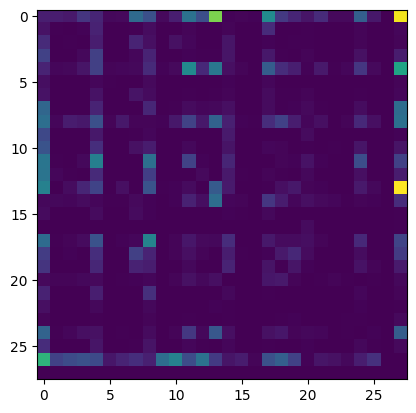

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

(-0.5, 27.5, 27.5, -0.5)

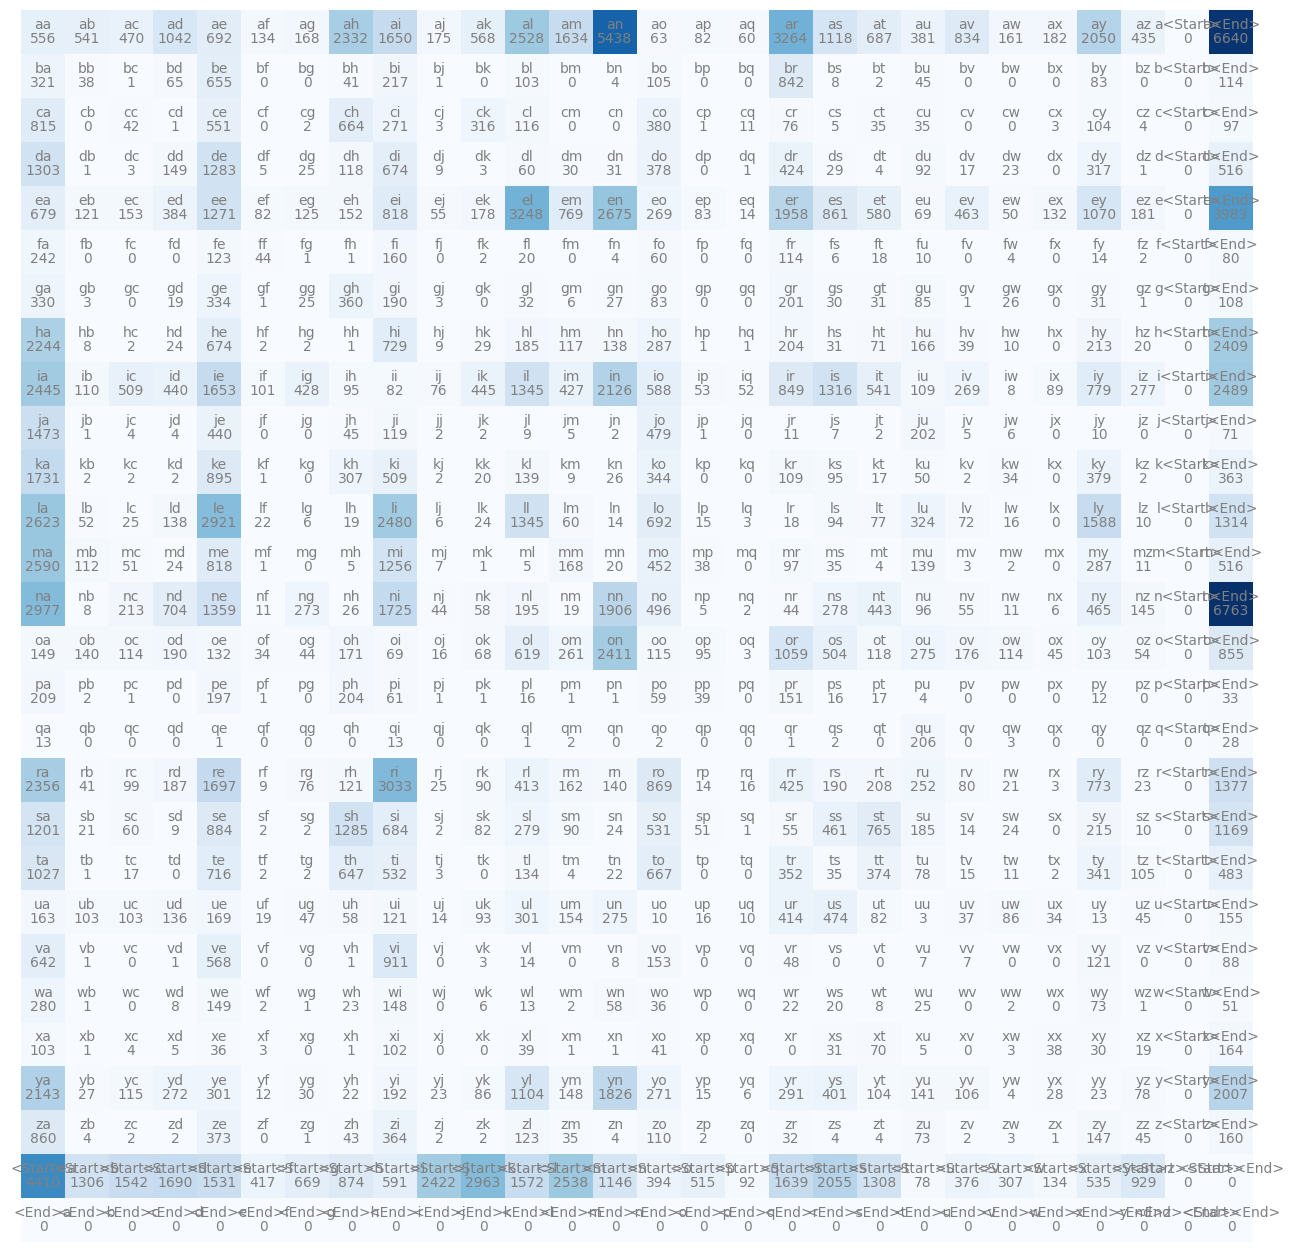

In [12]:
# Colormap of 28x28 2D Array
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = i_to_s[i] + i_to_s[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='gray')

plt.axis('off')